In [6]:
import pandas as pd

df = pd.read_excel(r'C:\Users\User\Desktop\Data\ML\Tasks\bank.xlsx')
print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
df['qcut_age'] = pd.cut(df['age'], bins=range(10, df['age'].max() + 10, 10))

print(df['qcut_age'])

0       (20, 30]
1       (30, 40]
2       (30, 40]
3       (20, 30]
4       (50, 60]
          ...   
4516    (30, 40]
4517    (50, 60]
4518    (50, 60]
4519    (20, 30]
4520    (40, 50]
Name: qcut_age, Length: 4521, dtype: category
Categories (8, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]


In [16]:
df['qcut_age_str'] = df['qcut_age'].astype(str)

In [18]:
print(type(df['qcut_age_str']))

<class 'pandas.core.series.Series'>


In [26]:
for col in df_copy.columns:
    print(f"{col} --> {df_copy[col].apply(type).unique()}")

age --> [<class 'int'>]
job --> [<class 'str'>]
marital --> [<class 'str'>]
education --> [<class 'str'>]
default --> [<class 'str'>]
balance --> [<class 'int'>]
housing --> [<class 'str'>]
loan --> [<class 'str'>]
contact --> [<class 'str'>]
day --> [<class 'int'>]
month --> [<class 'str'>]
duration --> [<class 'int'>]
campaign --> [<class 'int'>]
pdays --> [<class 'int'>]
previous --> [<class 'int'>]
poutcome --> [<class 'str'>]
y --> [<class 'str'>]
qcut_age_str --> [<class 'str'>]


In [24]:
#Age analyze
import duckdb 
import pandas as pd

df_copy = df.copy()
df_copy = df_copy.drop(columns=['qcut_age'])


con = duckdb.connect()
age_df = con.execute(""" SELECT qcut_age_str, COUNT(qcut_age_str) AS count_age FROM df_copy GROUP BY qcut_age_str ORDER BY count_age DESC""").df()

print(age_df)

  qcut_age_str  count_age
0     (30, 40]       1800
1     (40, 50]       1162
2     (50, 60]        800
3     (20, 30]        625
4     (60, 70]         73
5     (70, 80]         46
6     (80, 90]          8
7     (10, 20]          7


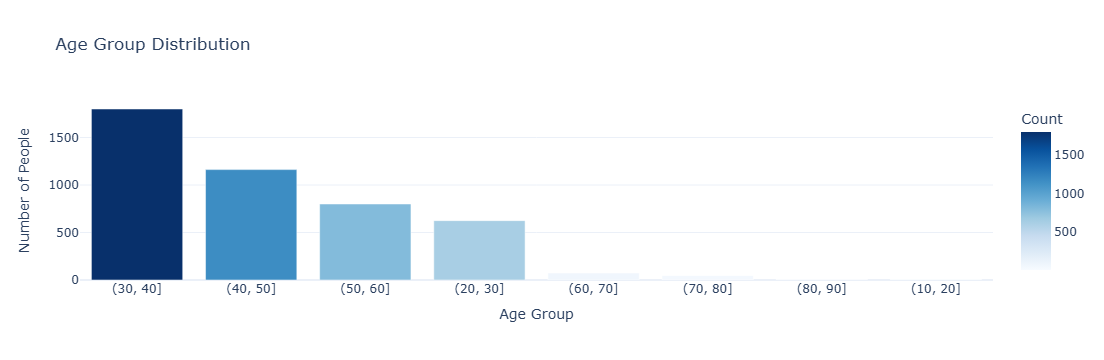

In [30]:
import plotly.express as px

fig = px.bar(age_df,
             x='qcut_age_str',
             y='count_age',
             title='Age Group Distribution',
             labels={'qcut_age_str': 'Age Group', 'count_age': 'Count'},
             color='count_age',
             color_continuous_scale='Blues')

fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Number of People",
    template='plotly_white'
)

fig.show()


In [32]:
#Job analyze
import duckdb 

con = duckdb.connect()
job_df = con.execute(""" SELECT job, COUNT(job) AS count_job FROM df_copy GROUP BY job ORDER BY count_job DESC""").df()

print(job_df)

              job  count_job
0      management        969
1     blue-collar        946
2      technician        768
3          admin.        478
4        services        417
5         retired        230
6   self-employed        183
7    entrepreneur        168
8      unemployed        128
9       housemaid        112
10        student         84
11        unknown         38


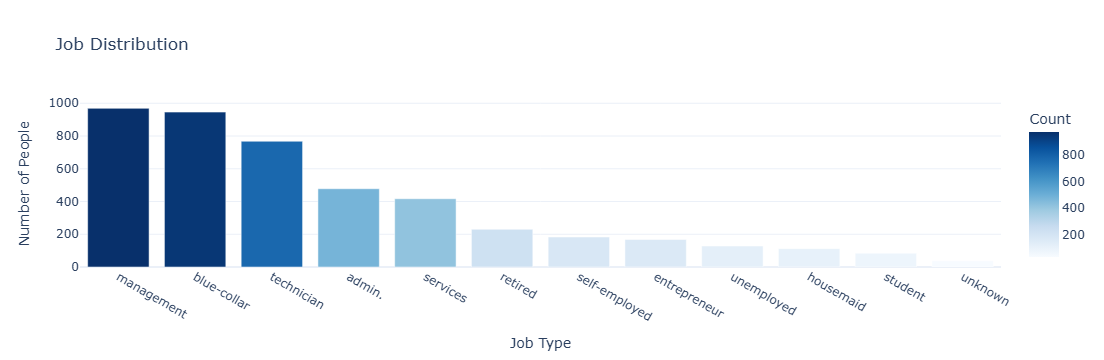

In [34]:
import plotly.express as px

fig = px.bar(job_df,
             x='job',
             y='count_job',
             title='Job Distribution',
             labels={'job': 'Job Type', 'count_job': 'Count'},
             color='count_job',
             color_continuous_scale='Blues')

fig.update_layout(
    xaxis_title='Job Type',
    yaxis_title='Number of People',
    template='plotly_white'
)

fig.show()


In [36]:
#Education analyze

import duckdb 

con = duckdb.connect()
educ_df = con.execute(""" SELECT education, COUNT(education) AS count_education FROM df_copy GROUP BY education ORDER BY count_education DESC""").df()

print(educ_df)

   education  count_education
0  secondary             2306
1   tertiary             1350
2    primary              678
3    unknown              187


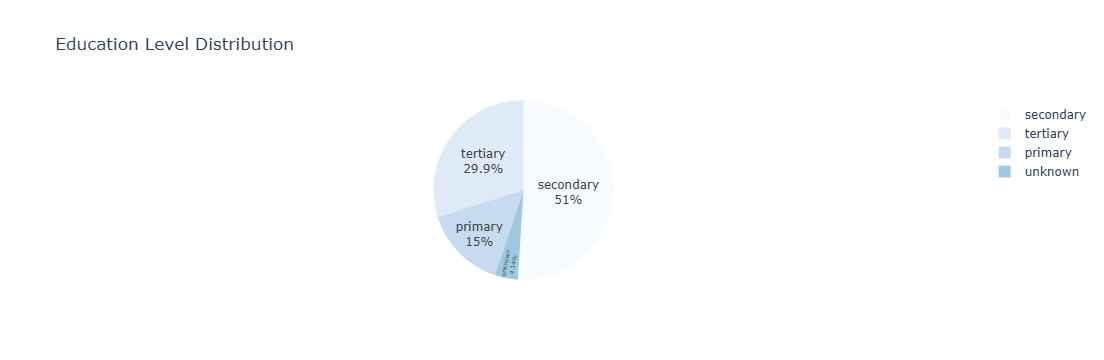

In [38]:
import plotly.express as px

fig = px.pie(
    educ_df, 
    names='education',
    values='count_education',
    title='Education Level Distribution',
    color_discrete_sequence=px.colors.sequential.Blues
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label'
)

fig.update_layout(template='plotly_white')

fig.show()

In [40]:
#Job analyze
import duckdb 

con = duckdb.connect()
loan_df = con.execute(""" SELECT loan, COUNT(loan) AS count_loan FROM df_copy GROUP BY loan ORDER BY count_loan DESC""").df()

print(loan_df)

  loan  count_loan
0   no        3830
1  yes         691


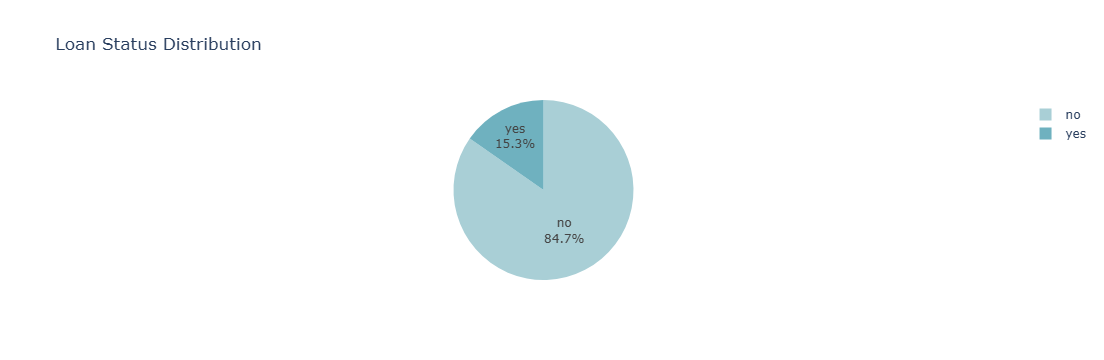

In [42]:
#Loan analyze
import plotly.express as px

iceberg_colors = ['#a9cfd6', '#6fb1bf'] 

fig = px.pie(
    loan_df,  
    names='loan',
    values='count_loan',
    title='Loan Status Distribution',
    color_discrete_sequence=iceberg_colors
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hoverinfo='label+percent+value'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()


In [44]:
# Housing analyze

#Job analyze
import duckdb 

con = duckdb.connect()
housing_df = con.execute(""" SELECT housing, COUNT(housing) AS count_housing FROM df_copy GROUP BY housing ORDER BY count_housing DESC""").df()

print(loan_df)

  loan  count_loan
0   no        3830
1  yes         691


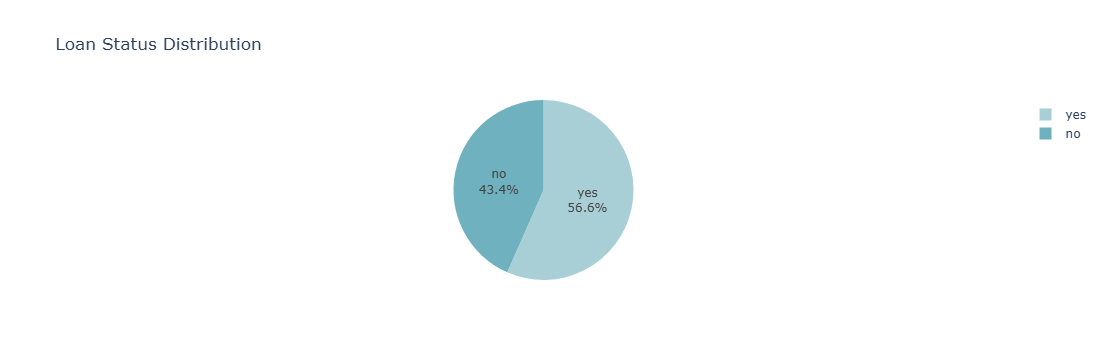

In [46]:
#Loan analyze
import plotly.express as px

iceberg_colors = ['#a9cfd6', '#6fb1bf'] 

fig = px.pie(
    housing_df,  
    names='housing',
    values='count_housing',
    title='Loan Status Distribution',
    color_discrete_sequence=iceberg_colors
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hoverinfo='label+percent+value'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()

In [48]:
#Contact analyze
import duckdb 

con = duckdb.connect()
contact_df = con.execute(""" SELECT contact, COUNT(contact) AS count_contact FROM df_copy GROUP BY contact ORDER BY count_contact DESC""").df()

print(contact_df)

     contact  count_contact
0   cellular           2896
1    unknown           1324
2  telephone            301


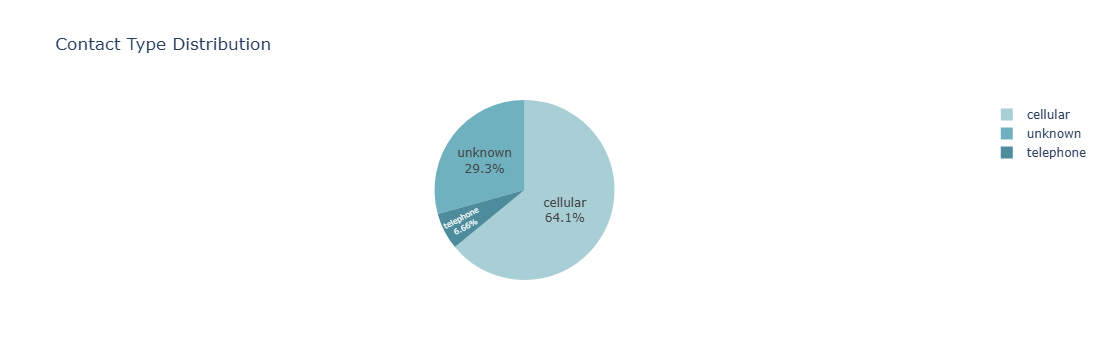

In [50]:
import plotly.express as px

# Aysberq mavisi tonları (açıqdan tündə)
iceberg_colors = ['#a9cfd6', '#6fb1bf', '#4c8c9c']

fig = px.pie(
    contact_df,  # Əgər DataFrame-in adı fərqlidirsə, onu dəyiş
    names='contact',
    values='count_contact',
    title='Contact Type Distribution',
    color_discrete_sequence=iceberg_colors
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    hoverinfo='label+percent+value'
)

fig.update_layout(
    template='plotly_white'
)

fig.show()

In [52]:
import duckdb 

con = duckdb.connect()
loan_df = con.execute(""" SELECT loan, COUNT(loan) AS count_loan FROM df_copy  WHERE contact = 'unknown' GROUP BY loan ORDER BY count_loan DESC """).df()

print(loan_df)

  loan  count_loan
0   no        1126
1  yes         198


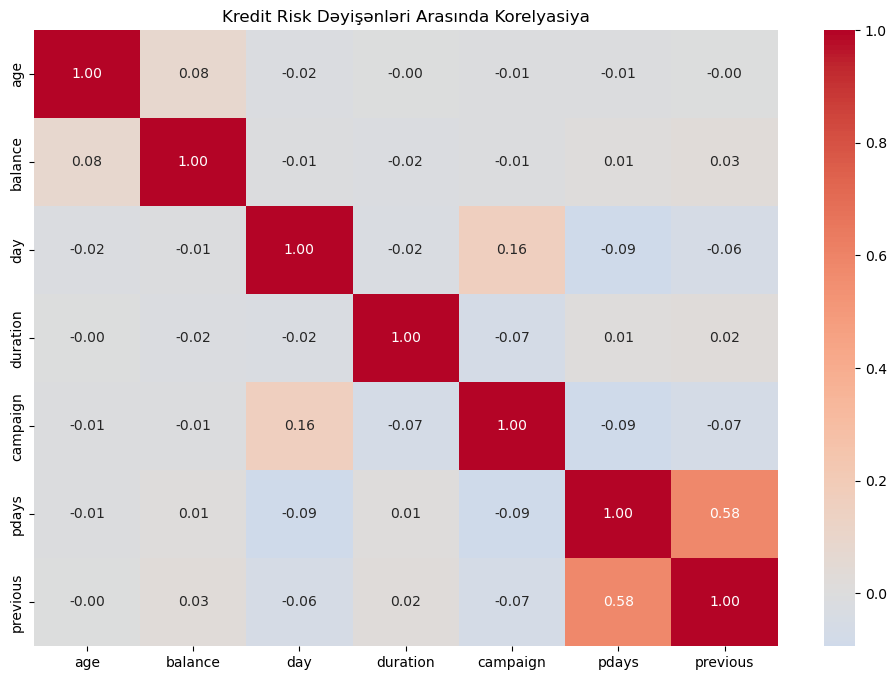

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Numerik sütunlar üçün korelyasiya
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_cols].corr()

# Korelyasiya matrisinin vizuallaşdırılması
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Kredit Risk Dəyişənləri Arasında Korelyasiya')
plt.show()

In [62]:
import duckdb 

con = duckdb.connect()
new_df = con.execute(""" SELECT pdays, previous FROM df_copy ORDER BY previous DESC""").df()

print(new_df)

      pdays  previous
0       367        25
1       173        24
2       353        23
3       363        22
4       137        20
...     ...       ...
4516     -1         0
4517     -1         0
4518     -1         0
4519     -1         0
4520     -1         0

[4521 rows x 2 columns]


In [64]:
import duckdb 

con = duckdb.connect()
new_df = con.execute(""" SELECT pdays, previous FROM df_copy ORDER BY previous""").df()

print(new_df)

      pdays  previous
0        -1         0
1        -1         0
2        -1         0
3        -1         0
4        -1         0
...     ...       ...
4516    137        20
4517    363        22
4518    353        23
4519    173        24
4520    367        25

[4521 rows x 2 columns]
